In [8]:
using ColoringNames

INFO: Precompiling module ColoringNames.


In [9]:
function mklogdir(name)
    logdir = joinpath(pwd(), "logs", name)
    mkpath(logdir)
    logdir
end

mklogdir (generic function with 1 method)

In [10]:
many_names = load_color_nameset()
word_embs, vocab, enc = load_text_embeddings(keep_words=many_names)
cldata = load_munroe_data(dev_as_train=false, dev_as_test=true, encoding_ = enc)

ColoringNames.ColorDatasets{MLLabelUtils.LabelEnc.NativeLabels{String,2833},ColoringNames.ColorDataset{Array{Any,1},Array{Int64,2},Array{Float32,2}}}(MLLabelUtils.LabelEnc.NativeLabels{String,2833}(String["and", "of", "a", "with", "'s", "not", "-", "your", "just", "can"  …  "Feijoa", "melanzane", "minsk", "Pizazz", "feijoa", "red1", "Kilamanjaro", "karaka", "bilbao", "mabel"], Dict("Apple"=>157,"Caper"=>2160,"chocolate"=>424,"Casablanca"=>1155,"Many"=>84,"Luxor"=>1613,"star"=>103,"canyon"=>900,"bombay"=>2563,"bondi"=>2662…)), ColoringNames.ColorDataset{Array{Any,1},Array{Int64,2},Array{Float32,2}}(Any["acid green", "acid green", "acid green", "acid green", "acid green", "acid green", "acid green", "acid green", "acid green", "acid green"  …  "yuck", "yuck", "yuck", "yuck", "yuck", "yuck", "yuck", "yuck", "yuck", "yuck"], [338 338 … 2148 2148; 114 114 … 0 0; 0 0 … 0 0; 0 0 … 0 0], Float32[0.344113 0.855319 0.921569; 0.281905 0.744681 0.921569; … ; 0.376894 0.768559 0.898039; 0.179104 0.

In [11]:
sowe_unsmoothed = TermToColorDistributionSOWE(enc, word_embs; n_steps=size(cldata.train.terms_padded,1))
train!(sowe_unsmoothed, cldata, Val{false}();
        log_dir = mklogdir("sowe7_unsmoothed"),
        batch_size = 829,
        min_epochs=300,
        max_epochs=30_000,
        )

2018-05-16 18:43:05.803662: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2


ColoringNames.TermToColorDistributionSOWE{TensorFlow.Tensor{Any},MLLabelUtils.LabelEnc.NativeLabels{String,2833},TensorFlow.Tensor{String}}(MLLabelUtils.LabelEnc.NativeLabels{String,2833}(String["and", "of", "a", "with", "'s", "not", "-", "your", "just", "can"  …  "Feijoa", "melanzane", "minsk", "Pizazz", "feijoa", "red1", "Kilamanjaro", "karaka", "bilbao", "mabel"], Dict("Apple"=>157,"Caper"=>2160,"chocolate"=>424,"Casablanca"=>1155,"Many"=>84,"Luxor"=>1613,"star"=>103,"canyon"=>900,"bombay"=>2563,"bondi"=>2662…)), Session(Ptr{Void} @0x00007f9c64dea130), <Tensor Group:1 shape=unknown dtype=Any>, <Tensor MergeSummary:1 shape=unknown dtype=String>)

In [12]:
sowe_smoothed = TermToColorDistributionSOWE(enc, word_embs; n_steps=size(cldata.train.terms_padded,1))
train!(sowe_smoothed, cldata, Val{true}();
        log_dir=mklogdir("sowe7_smoothed"),
        batch_size = 829,
        min_epochs=300,
        max_epochs=30_000,
        )

ColoringNames.TermToColorDistributionSOWE{TensorFlow.Tensor{Any},MLLabelUtils.LabelEnc.NativeLabels{String,2833},TensorFlow.Tensor{String}}(MLLabelUtils.LabelEnc.NativeLabels{String,2833}(String["and", "of", "a", "with", "'s", "not", "-", "your", "just", "can"  …  "Feijoa", "melanzane", "minsk", "Pizazz", "feijoa", "red1", "Kilamanjaro", "karaka", "bilbao", "mabel"], Dict("Apple"=>157,"Caper"=>2160,"chocolate"=>424,"Casablanca"=>1155,"Many"=>84,"Luxor"=>1613,"star"=>103,"canyon"=>900,"bombay"=>2563,"bondi"=>2662…)), Session(Ptr{Void} @0x00007f9c3a48e510), <Tensor Group:1 shape=unknown dtype=Any>, <Tensor MergeSummary:1 shape=unknown dtype=String>)

In [13]:
evaluate(sowe_unsmoothed, cldata.dev)

Dict{Symbol,Float64} with 5 entries:
  :perp        => 156.849
  :perp_val    => 192.647
  :mse_to_peak => 0.25194
  :perp_sat    => 294.292
  :perp_hue    => 68.0619

In [15]:
evaluate(sowe_smoothed, cldata.dev)

Dict{Symbol,Float64} with 5 entries:
  :perp        => 192.434
  :perp_val    => 198.989
  :mse_to_peak => 0.348493
  :perp_sat    => 221.722
  :perp_hue    => 161.512

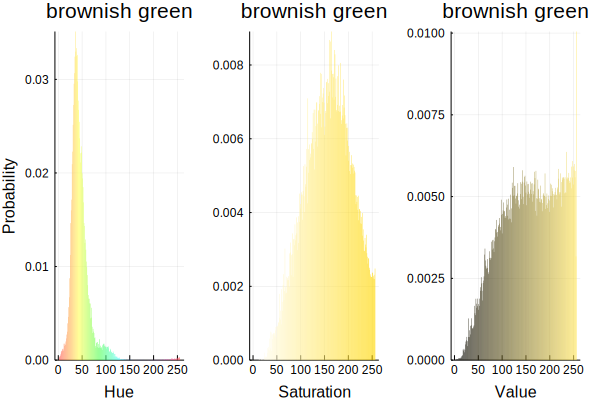

(h_max, s_max, v_max) = (0.140625, 0.64453125, 1.0)


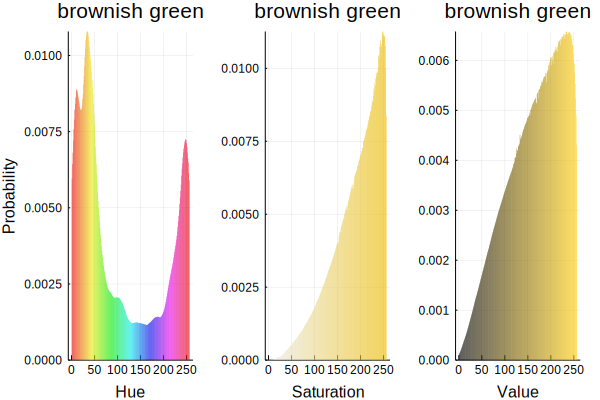

(h_max, s_max, v_max) = (0.1328125, 0.96875, 0.91796875)


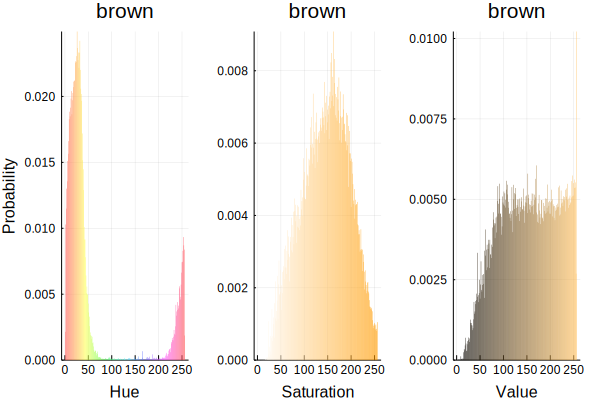

(h_max, s_max, v_max) = (0.1015625, 0.6328125, 1.0)


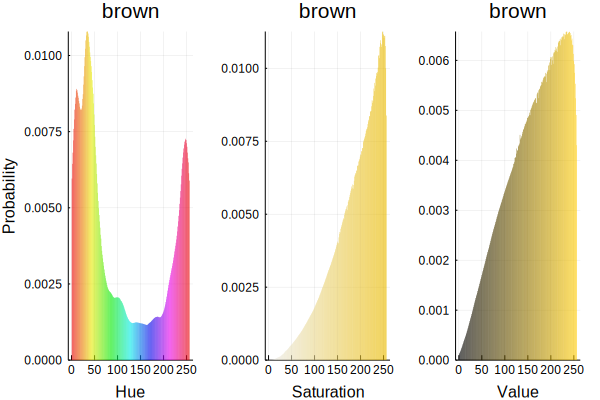

(h_max, s_max, v_max) = (0.1328125, 0.96875, 0.91796875)


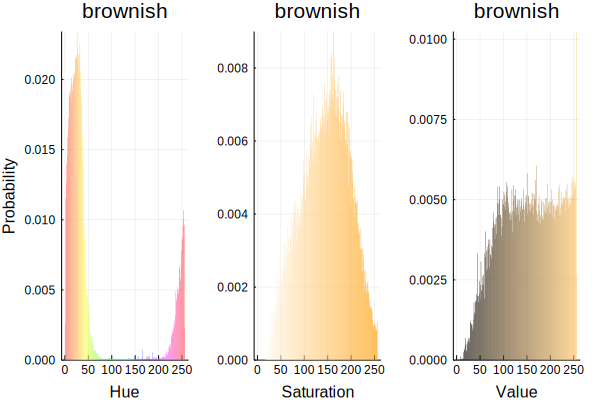

(h_max, s_max, v_max) = (0.1015625, 0.6328125, 1.0)


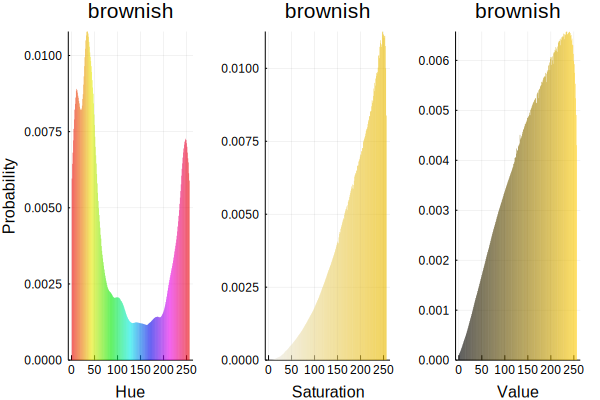

(h_max, s_max, v_max) = (0.1328125, 0.96875, 0.91796875)


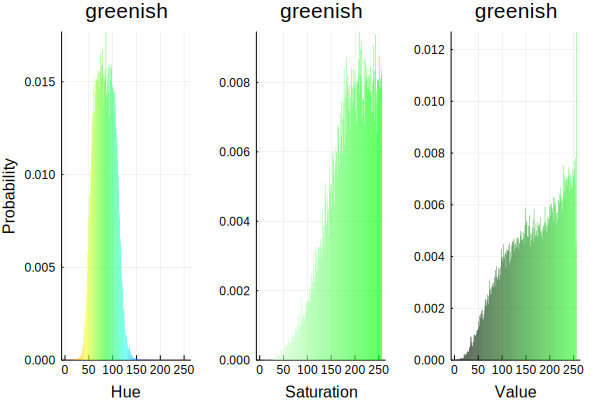

(h_max, s_max, v_max) = (0.3359375, 0.81640625, 1.0)


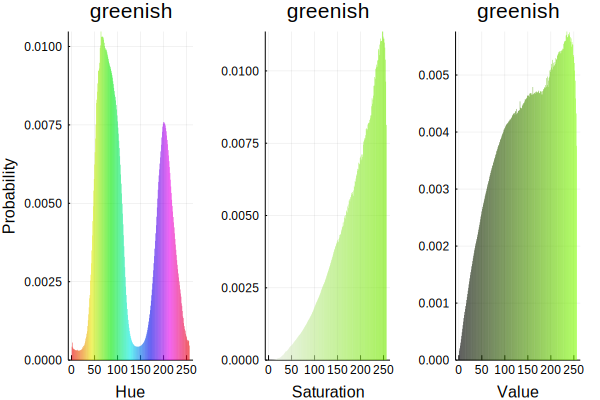

(h_max, s_max, v_max) = (0.25, 0.96875, 0.91796875)


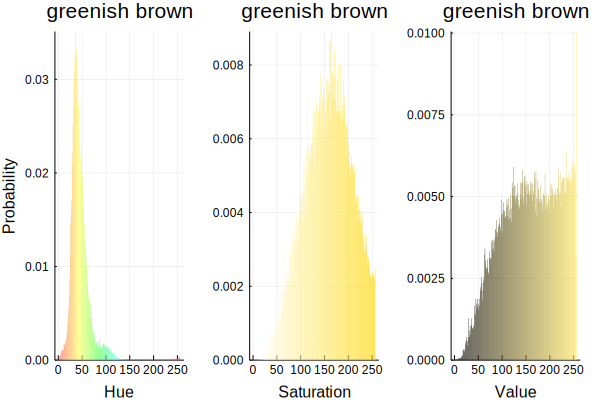

(h_max, s_max, v_max) = (0.140625, 0.64453125, 1.0)


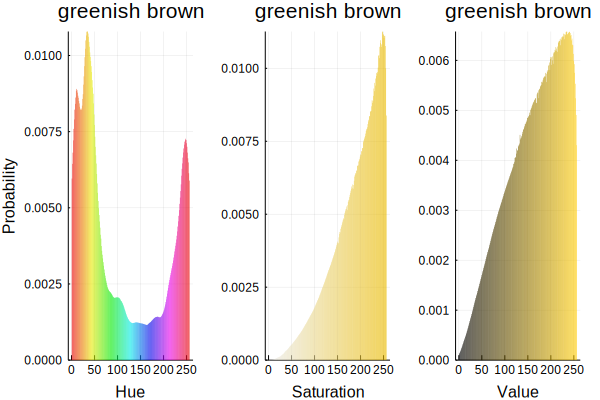

(h_max, s_max, v_max) = (0.1328125, 0.96875, 0.91796875)


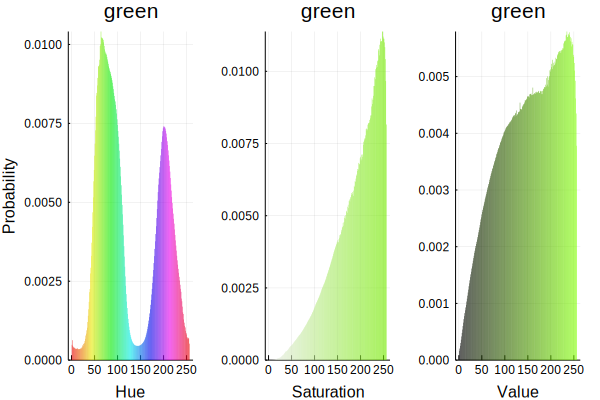

(h_max, s_max, v_max) = (0.25, 0.96875, 0.91796875)


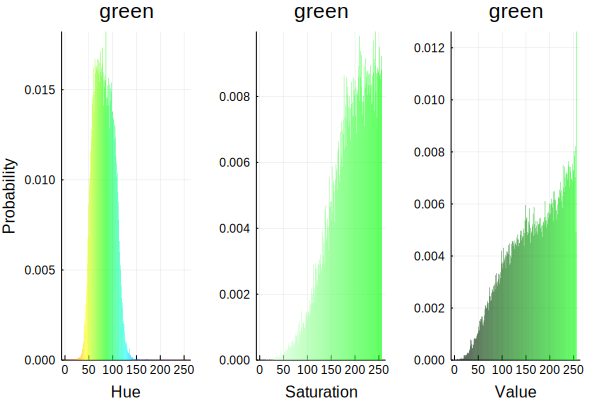

(h_max, s_max, v_max) = (0.3359375, 0.94921875, 1.0)


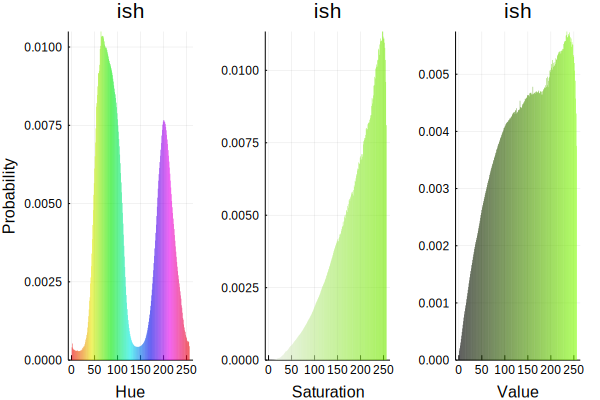

(h_max, s_max, v_max) = (0.25, 0.96875, 0.91796875)


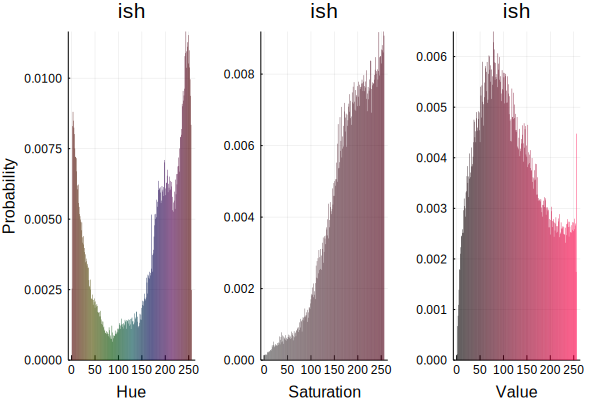

(h_max, s_max, v_max) = (0.953125, 0.99609375, 0.3046875)


In [18]:
plot_query(sowe_unsmoothed,  "brownish green") |> display
plot_query(sowe_smoothed,  "brownish green") |> display
plot_query(sowe_unsmoothed,  "brown") |> display
plot_query(sowe_smoothed,  "brown") |> display
plot_query(sowe_unsmoothed,  "brownish") |> display
plot_query(sowe_smoothed,  "brownish") |> display
plot_query(sowe_unsmoothed,  "greenish") |> display
plot_query(sowe_smoothed,  "greenish") |> display
plot_query(sowe_unsmoothed,  "greenish brown") |> display
plot_query(sowe_smoothed,  "greenish brown") |> display
plot_query(sowe_smoothed,  "green")|> display
plot_query(sowe_unsmoothed,  "green")|> display
plot_query(sowe_smoothed,  "ish")|> display
plot_query(sowe_unsmoothed,  "ish")|> display